In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
%matplotlib inline

In [5]:
uri = 'https://www.worldometers.info/coronavirus/'
page = requests.get(uri)
soup = BeautifulSoup(page.content, 'html.parser')

In [6]:
import json
import re

scripts = soup.find_all('script')

for script in scripts:
    if len(script.contents) == 0: continue
    result = re.search("((Highcharts.chart\('coronavirus-cases-daily', {)(.|\n)*(}\);))", script.contents[0])
    if result:
        re_categories = re.search('((categories: \[)("(\w|\s)+",)*("(\w|\s)+")(\]))', result.group())
        re_categories = re.search('((\[)("(\w|\s)+",)*("(\w|\s)+")(\]))', re_categories.group())

        re_data = re.search('((data: \[)((.)+,)*((.)+)(\]))', result.group())
        re_data = re.search('((\[)((.)+,)*((.)+)(\]))', re_data.group())
        
        data_json = f'{{ "date": {re_categories.group()}, "cases": {re_data.group()} }}'
        data_json = json.loads(data_json)

        break

data = pd.DataFrame(data_json).dropna()
data

,date,cases
1,Jan 23,267.0
2,Jan 24,473.0
3,Jan 25,699.0
4,Jan 26,786.0
5,Jan 27,1784.0
...,...,...
350,Jan 06,807649.0
351,Jan 07,833976.0
352,Jan 08,833495.0
353,Jan 09,731504.0


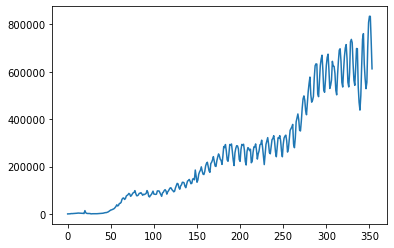

In [7]:
plt.plot(np.arange(len(data['date'])), np.array(data['cases']))
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.arange(len(data['date']))
y = np.array(data['cases'])
X = np.reshape(X, (-1, 1))
y = np.reshape(y, (-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [9]:

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8966481356337054

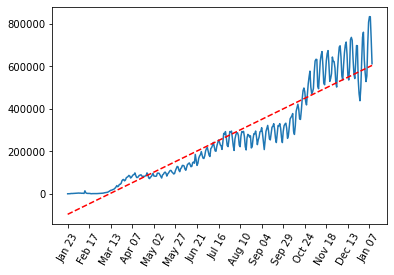

In [10]:
y_predict = reg.predict(np.arange(len(data['date'])).reshape((-1, 1)))

xticks_values = np.reshape(X, (1, -1))[0]
xticks_labels = data['date'].tolist()
x_step = 25

plt.plot(X, data['cases'])
plt.plot(X, y_predict, 'r--')
plt.xticks(xticks_values[::x_step], xticks_labels[::x_step], rotation=60)
plt.show()